In [4]:
import numpy as np
import matplotlib.pyplot as plt

### See https://stackoverflow.com/questions/39336727/get-lag-with-cross-correlation

In [43]:
dt = 0.005
t_steps = np.arange(0, 1, dt)
a_sig = np.sin(2*np.pi*t_steps*4+5)
b_sig = np.sin(2*np.pi*t_steps*4)

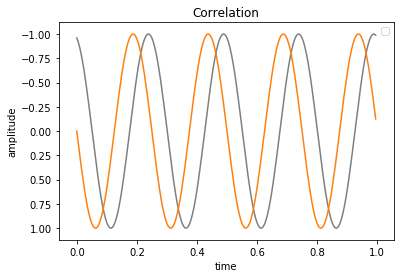

In [44]:
fig, ax = plt.subplots()
ax.plot(t_steps, a_sig, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, b_sig, marker='', linestyle='-', ms=5, color='tab:orange')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.gca().invert_yaxis()
plt.show()

In [45]:
from scipy.signal import correlate

lag = np.argmax(correlate(a_sig, b_sig))  # wrt indexes
c_sig = np.roll(b_sig, shift=int(np.ceil(lag)))

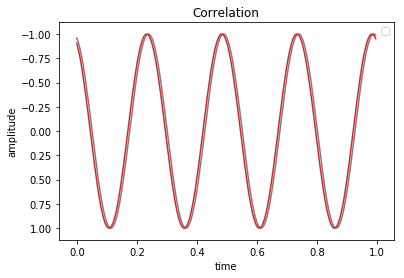

In [48]:
fig, ax = plt.subplots()
ax.plot(t_steps, a_sig, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, c_sig, marker='', linestyle='-', ms=5, color='tab:red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.gca().invert_yaxis()
plt.show()

In [57]:
noise_1 = np.random.normal(0, 0.08, a_sig.shape)
noise_2 = np.random.normal(0, 0.08, a_sig.shape)

In [58]:
d_sig = b_sig + noise_1
e_sig = a_sig + noise_2

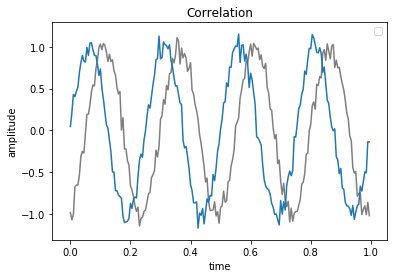

In [59]:
fig, ax = plt.subplots()
ax.plot(t_steps, e_sig, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, d_sig, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [60]:
lag = np.argmax(correlate(e_sig, d_sig))  # wrt indexes
d_sig_shifted = np.roll(d_sig, shift=int(np.ceil(lag)))

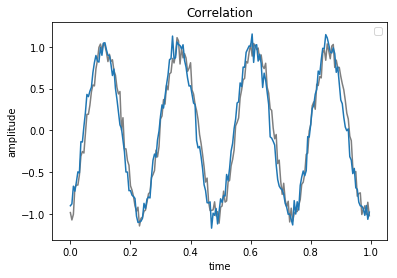

In [61]:
fig, ax = plt.subplots()
ax.plot(t_steps, e_sig, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, d_sig_shifted, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [64]:
a_sig_reduced = 0.6*np.sin(2*np.pi*t_steps*4+5)
a_sig_reduced += noise_2

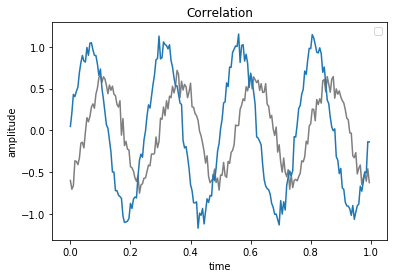

In [65]:
fig, ax = plt.subplots()
ax.plot(t_steps, a_sig_reduced, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, d_sig, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [66]:
lag = np.argmax(correlate(a_sig_reduced, d_sig))  # wrt indexes
d_sig_shifted = np.roll(d_sig, shift=int(np.ceil(lag)))

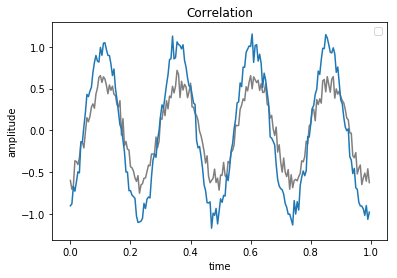

In [67]:
fig, ax = plt.subplots()
ax.plot(t_steps, a_sig_reduced, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_steps, d_sig_shifted, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

### Now try it on more realistic peaks

In [97]:
a = np.array([1,1,1,1,5,6,5,1,1,1,1])

In [118]:
b = np.roll(a, 3) / 2.5

In [119]:
t = np.arange(0,len(a))

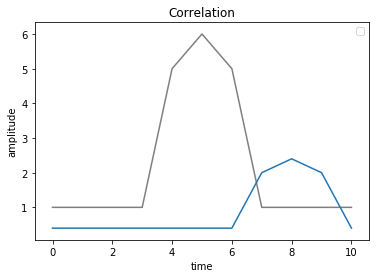

In [120]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t, b, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [136]:
np.corrcoef(a, b)[1,0]

-0.36899563318777295

In [121]:
a

array([1, 1, 1, 1, 5, 6, 5, 1, 1, 1, 1])

In [122]:
correlate(a, b)

array([ 0.4,  2.4,  4.8,  6.8,  8.8, 17.6, 29.2, 36.4, 30. , 20.8, 14.8,
       14.4, 12.4, 10. ,  8. ,  6. ,  3.6,  1.6,  1.2,  0.8,  0.4])

In [123]:
lag = np.argmax(correlate(a, b)) - (len(a)-1)  # wrt indexes
lag

-3

In [124]:
b_shifted = np.roll(b, shift=int(np.ceil(lag)))

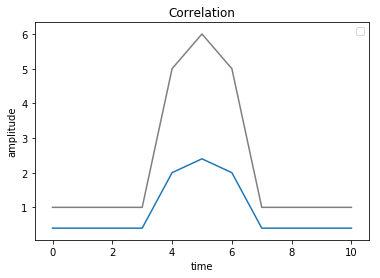

In [134]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t, b_shifted, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [135]:
np.corrcoef(a, b_shifted)[1,0]

1.0

In [126]:
c = np.array([1,1,1,1,1,1,1,2,10,8,1])

In [127]:
lag = np.argmax(correlate(a, c)) - (len(a)-1)  # wrt indexes
lag

-3

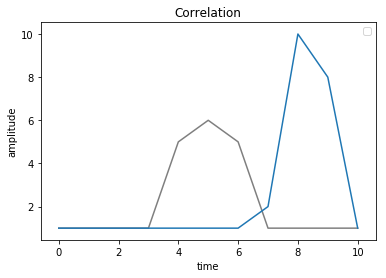

In [137]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t, c, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [138]:
np.corrcoef(a, c)[1,0]

-0.3042518972928643

In [129]:
c_shifted = np.roll(c, shift=int(np.ceil(lag)))

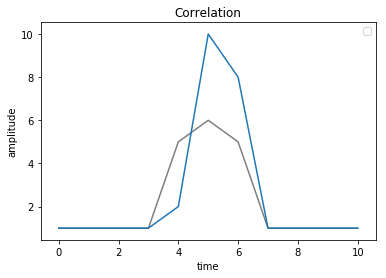

In [130]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t, c_shifted, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [132]:
np.corrcoef(a, c_shifted)[1,0]

0.8618175914268462

### Correlation of mismatched lengths

In [193]:
d = np.array([1,2,10,8,1])
t_d = np.arange(0,len(d))

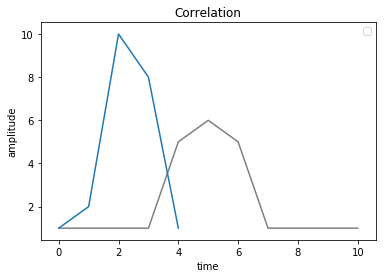

In [194]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t_d, d, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()

In [195]:
lag = np.argmax(correlate(a, d)) - (len(a)-1)  # wrt indexes
lag

-3

In [218]:
d_1 = np.full(len(a), d[len(d)-1], dtype=int)
d_1[:len(d)] = d
d_1

array([ 1,  2, 10,  8,  1,  1,  1,  1,  1,  1,  1])

In [219]:
from scipy.ndimage.interpolation import shift
d_shifted = shift(d_1, -lag, cval=d_1[0])
d_shifted

array([ 1,  1,  1,  1,  2, 10,  8,  1,  1,  1,  1])

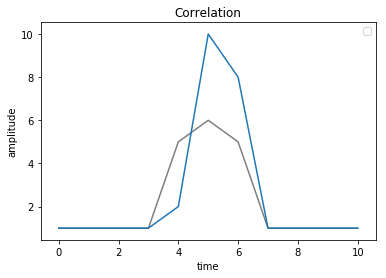

In [220]:
fig, ax = plt.subplots()
ax.plot(t, a, marker='', linestyle='-', ms=5, color='tab:gray')
ax.plot(t, d_shifted, marker='', linestyle='-', ms=5, color='tab:blue')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.margins(0.06)
plt.title('Correlation')
plt.show()